In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [8]:
data = pd.read_csv("Salary_Data.csv")
data

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0
5,2.9,56642.0
6,3.0,60150.0
7,3.2,54445.0
8,3.2,64445.0
9,3.7,57189.0


Text(0, 0.5, 'Salary')

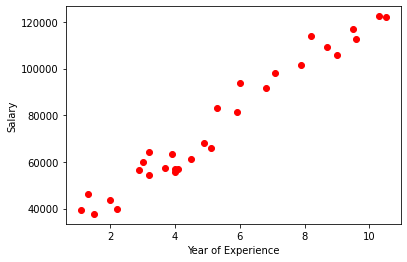

In [9]:
X = data[["YearsExperience"]]
y = data.Salary

plt.scatter(x, y, c="red")
plt.xlabel("Year of Experience")
plt.ylabel("Salary")

Spliting data into training and testset

In [10]:
from sklearn.model_selection import train_test_split

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=1/5.0, random_state=0)

In [17]:
X_train

,YearsExperience
27,9.6
11,4.0
17,5.3
22,7.9
5,2.9
16,5.1
8,3.2
14,4.5
23,8.2
20,6.8


In [18]:
X_test

,YearsExperience
2,1.5
28,10.3
13,4.1
10,3.9
26,9.5
24,8.7


In [19]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

In [22]:
# #to find degree value
# for i in range(1, 20):
#     poly = PolynomialFeatures(degree=i)
#     X_poly = poly.fit_transform(X)
#     lin2 = LinearRegression()
#     lin2.fit(X_poly, y)
#     print(i, " ", lin2.score(X_poly, y)* 100)

1   95.69566641435085
2   95.6975168321065
3   96.35969766249464
4   96.36560599375092
5   96.65546834956739
6   96.73693577169902
7   97.22578921026948
8   97.2815430714499
9   97.32969097550307
10   98.09837407261305
11   98.21818407780198
12   98.30508114417623
13   98.30301072840254
14   98.196893551577
15   98.04879680011618
16   97.92402694722566
17   98.00296915259703
18   96.55364747412646
19   95.8586913947672


In [23]:
poly = PolynomialFeatures(degree=12)
X_poly = poly.fit_transform(X_train)

poly.fit(X_poly, y_train)

lin = LinearRegression()
lin.fit(X_poly, y_train)

LinearRegression()

In [24]:
X_poly

array([[1.00000000e+00, 9.60000000e+00, 9.21600000e+01, 8.84736000e+02,
        8.49346560e+03, 8.15372698e+04, 7.82757790e+05, 7.51447478e+06,
        7.21389579e+07, 6.92533996e+08, 6.64832636e+09, 6.38239331e+10,
        6.12709757e+11],
       [1.00000000e+00, 4.00000000e+00, 1.60000000e+01, 6.40000000e+01,
        2.56000000e+02, 1.02400000e+03, 4.09600000e+03, 1.63840000e+04,
        6.55360000e+04, 2.62144000e+05, 1.04857600e+06, 4.19430400e+06,
        1.67772160e+07],
       [1.00000000e+00, 5.30000000e+00, 2.80900000e+01, 1.48877000e+02,
        7.89048100e+02, 4.18195493e+03, 2.21643611e+04, 1.17471114e+05,
        6.22596904e+05, 3.29976359e+06, 1.74887470e+07, 9.26903593e+07,
        4.91258904e+08],
       [1.00000000e+00, 7.90000000e+00, 6.24100000e+01, 4.93039000e+02,
        3.89500810e+03, 3.07705640e+04, 2.43087456e+05, 1.92039090e+06,
        1.51710881e+07, 1.19851596e+08, 9.46827608e+08, 7.47993811e+09,
        5.90915110e+10],
       [1.00000000e+00, 2.90000000e+

In [29]:
y_out = lin.predict(poly.fit_transform([[1007]]))
print(y_out)

[1.19793256e+34]


C:\Users\Kiran\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


In [30]:
y_pred = lin.predict(poly.fit_transform(X_test))
print(y_pred)

[ 45369.70382061 146308.04462356  56876.14274306  57261.27855314
 109087.70616533 109331.48209359]


In [31]:
df = pd.DataFrame({"Real Values":y_test, "Predicted Values": y_pred})
print(df)

    Real Values  Predicted Values
2       37731.0      45369.703821
28     122391.0     146308.044624
13      57081.0      56876.142743
10      63218.0      57261.278553
26     116969.0     109087.706165
24     109431.0     109331.482094


In [33]:
print(lin.score(X_poly, y_train)*100)

98.1506698659673


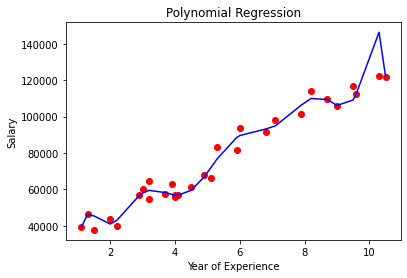

In [35]:
plt.scatter(X, y, color="red")
plt.plot(X, lin.predict(poly.fit_transform(X)), color="blue")
plt.title("Polynomial Regression")
plt.xlabel("Year of Experience")
plt.ylabel("Salary")
plt.show()